<a href="https://colab.research.google.com/github/MoncefDj/AI-DS-Masters/blob/main/TP3_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Simple convolutional autoencoder to reconstruct an image

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - loss: 0.0294 - val_loss: 0.0014
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - loss: 0.0013 - val_loss: 9.7147e-04
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - loss: 9.3700e-04 - val_loss: 8.1744e-04
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - loss: 8.0100e-04 - val_loss: 7.2944e-04
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - loss: 7.2296e-04 - val_loss: 6.7651e-04
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - loss: 6.7203e-04 - val_loss: 6.3734e-04
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 6.3986e-04 - val_loss: 6.1277e-04
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - loss: 6.1357e-04 - val_loss: 6.0079e-04
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - loss: 5.9547e-04 - val_loss: 5.7939e-04
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - loss: 5.7812e-04 - val_loss: 5.6780e-04
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s

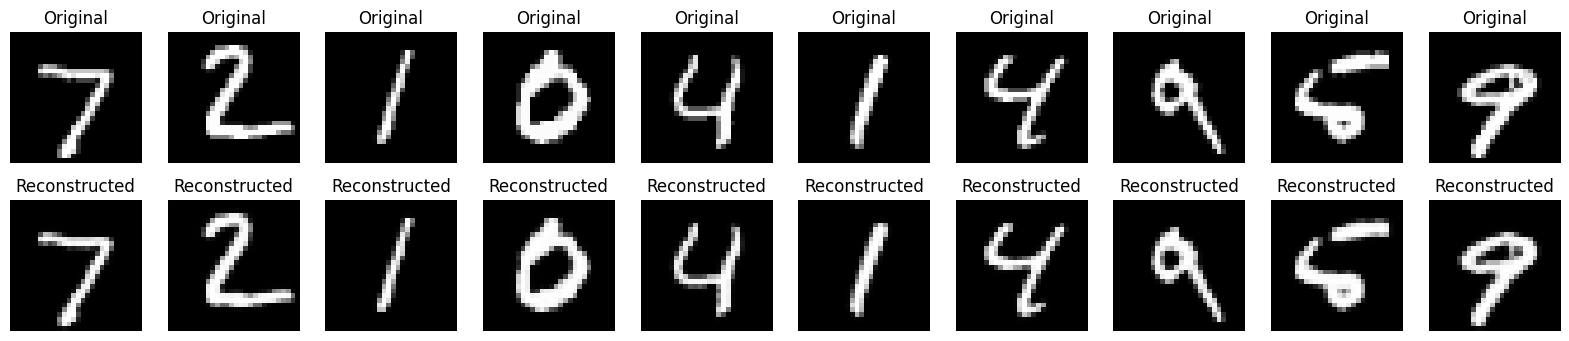

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.datasets import mnist

# Load and preprocess data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)

# Build autoencoder
input_img = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

# Latent space
encoded = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = layers.UpSampling2D((2, 2))(encoded)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train for fewer epochs with smaller batch size
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_test, x_test))

# Evaluate and visualize results
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()


#2 Use the latent space to classify the dataset using SVM.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Use encoder part of the autoencoder
encoder = tf.keras.Model(autoencoder.input, encoded)

# Extract latent features
latent_train = encoder.predict(x_train).reshape(len(x_train), -1)
latent_test = encoder.predict(x_test).reshape(len(x_test), -1)

# Use true MNIST labels for multi-class classification
(_, train_labels), (_, test_labels) = mnist.load_data()
train_labels = train_labels  # Subset labels for training data
test_labels = test_labels    # Subset labels for test data

# Train SVM with multi-class labels
svm = SVC(kernel='linear')
svm.fit(latent_train, train_labels)

# Test SVM
predicted_labels = svm.predict(latent_test)

# Calculate and display accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f"SVM Multi-Class Classification Accuracy: {accuracy * 100:.2f}%")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
SVM Multi-Class Classification Accuracy: 96.20%


#3 Denoising autoencoder to denoise / deblur / inpaint a particular image

##Denoise AE

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - loss: 0.0384 - val_loss: 0.0037
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - loss: 0.0030 - val_loss: 0.0030
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


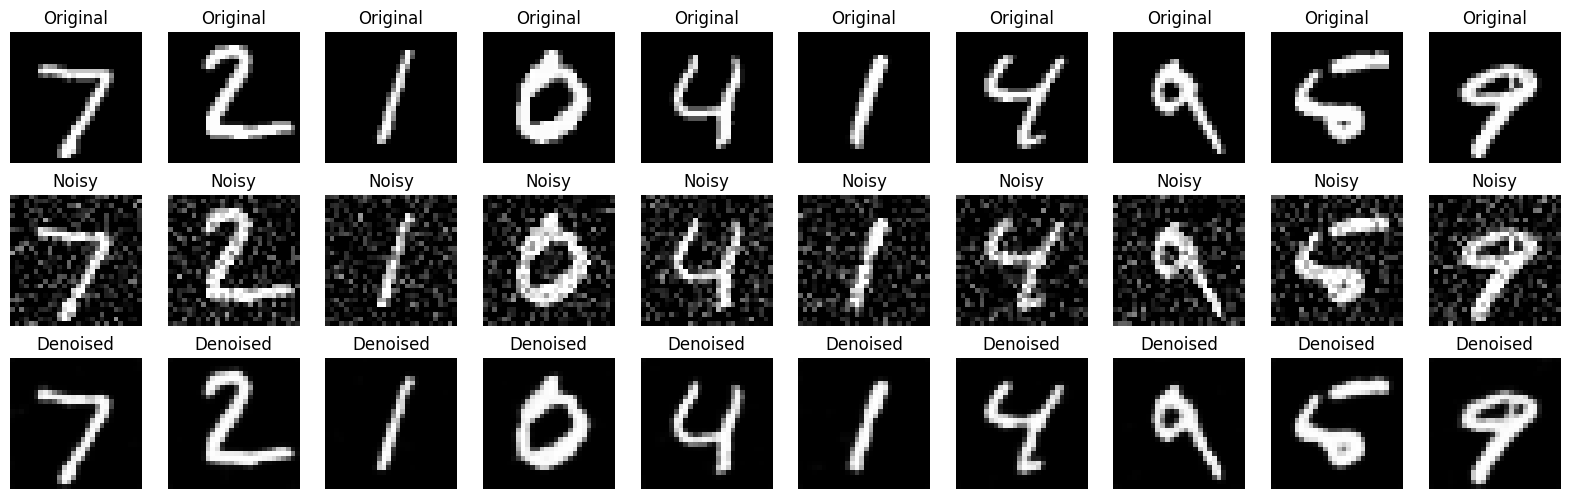

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)

# Add random noise to the images
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)  # Clip to valid range
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Build a minimal autoencoder
input_img = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = layers.UpSampling2D((2, 2))(encoded)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Model
denoising_autoencoder = models.Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
denoising_autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,  # Fewer epochs for quick testing
    batch_size=32,
    validation_data=(x_test_noisy, x_test)
)

# Test the autoencoder
decoded_imgs = denoising_autoencoder.predict(x_test_noisy)

# Display original, noisy, and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].squeeze(), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    plt.title("Denoised")
    plt.axis("off")

plt.show()


##Deblur AE

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - loss: 0.0386 - val_loss: 0.0027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 28ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 27ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - loss: 0.0013 - val_loss: 0.0012
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


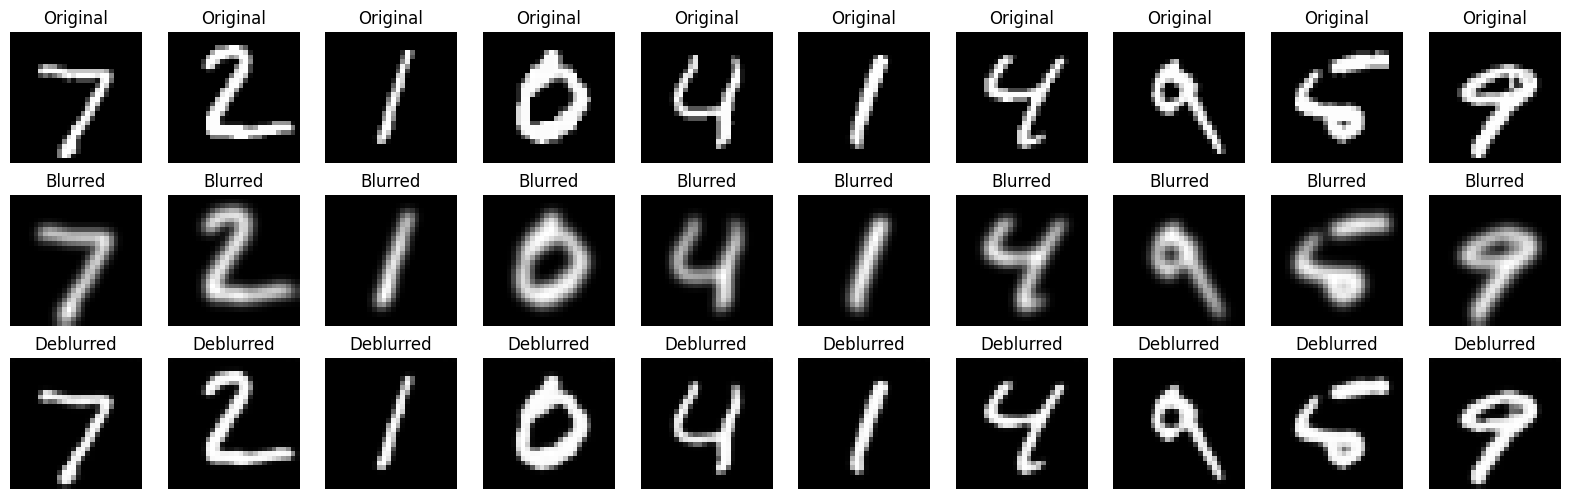

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2  # OpenCV for applying Gaussian blur

# Load and preprocess data (use a subset for quick testing)
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0  # Use 3000 samples
x_test = x_test.astype('float32') / 255.0    # Use 600 samples
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)

# Add Gaussian blur to the images
def add_blur(images):
    blurred_images = np.array([cv2.GaussianBlur(img.squeeze(), (5, 5), 0) for img in images])
    return np.expand_dims(blurred_images, axis=-1)

x_train_blurred = add_blur(x_train)
x_test_blurred = add_blur(x_test)

# Build a minimal autoencoder
input_img = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = layers.UpSampling2D((2, 2))(encoded)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Model
deblurring_autoencoder = models.Model(input_img, decoded)
deblurring_autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
deblurring_autoencoder.fit(
    x_train_blurred, x_train,
    epochs=10,  # Fewer epochs for quick testing
    batch_size=32,
    validation_data=(x_test_blurred, x_test)
)

# Test the autoencoder
decoded_imgs = deblurring_autoencoder.predict(x_test_blurred)

# Display original, blurred, and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Blurred
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_blurred[i].squeeze(), cmap='gray')
    plt.title("Blurred")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    plt.title("Deblurred")
    plt.axis("off")

plt.show()


##Inpaint AE

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - loss: 0.0397 - val_loss: 0.0084
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 0.0079 - val_loss: 0.0070
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - loss: 0.0069 - val_loss: 0.0063
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - loss: 0.0063 - val_loss: 0.0058
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - loss: 0.0059 - val_loss: 0.0055
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 12

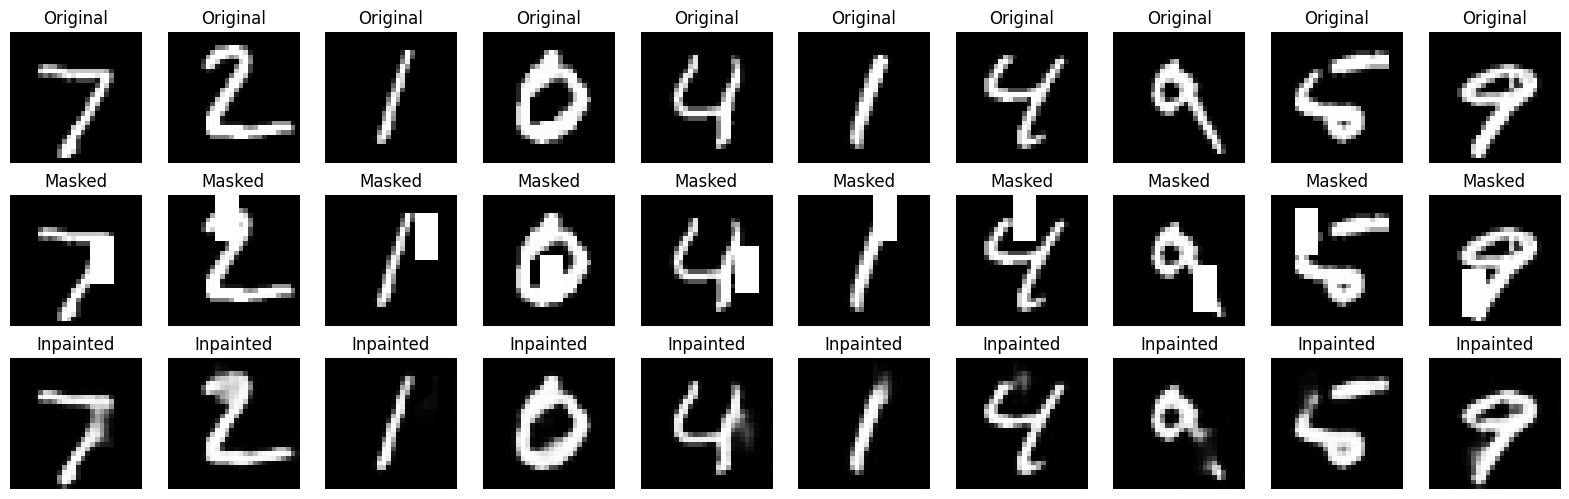

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess data (use a subset for quick testing)
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0  # Use 3000 samples
x_test = x_test.astype('float32') / 255.0    # Use 600 samples
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)

# Create masks for inpainting
def apply_mask(images, mask_fraction=0.2):
    masked_images = images.copy()
    for img in masked_images:
        h, w = img.shape[:2]
        # Determine the mask width and length
        mask_width = int(mask_fraction * min(h, w))
        mask_length = 2 * mask_width  # Length is double the width

        # Ensure the rectangle fits within the image boundaries
        if mask_length > h or mask_length > w:
            mask_length = min(h, w)
            mask_width = mask_length // 2

        # Generate a random position for the rectangle
        x_start = np.random.randint(0, w - mask_width)
        y_start = np.random.randint(0, h - mask_length)

        # Apply the mask (fill with ones)
        img[y_start:y_start + mask_length, x_start:x_start + mask_width] = 1
    return masked_images

x_train_masked = apply_mask(x_train)
x_test_masked = apply_mask(x_test)

# Build a minimal autoencoder
input_img = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = layers.UpSampling2D((2, 2))(encoded)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Model
inpainting_autoencoder = models.Model(input_img, decoded)
inpainting_autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
inpainting_autoencoder.fit(
    x_train_masked, x_train,
    epochs=20,  # Fewer epochs for quick testing
    batch_size=32,
    validation_data=(x_test_masked, x_test)
)

# Test the autoencoder
decoded_imgs = inpainting_autoencoder.predict(x_test_masked)

# Display original, masked, and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Masked
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_masked[i].squeeze(), cmap='gray')
    plt.title("Masked")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    plt.title("Inpainted")
    plt.axis("off")

plt.show()


#4 Recommender system

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Generate a random matrix with ratings in the range [0, 10]
np.random.seed(42)
M, N = 10, 8  # 10 users and 8 items
interaction_matrix = np.random.uniform(0, 10, size=(M, N))  # Ratings from 0 to 10

# Normalize the ratings to [0, 1] for better training
normalized_matrix = interaction_matrix / 10.0

# Mask some values by replacing them with 0.2 (representing missing data)
masked_matrix = normalized_matrix.copy()
mask = np.random.rand(*masked_matrix.shape) < 0.2
masked_matrix[mask] = 0  # Simulate partial data with a distinct "missing" value

# Create DataFrame for better readability
user_ids = [f"User {i+1}" for i in range(M)]
item_ids = [f"Item {j+1}" for j in range(N)]
original_df = pd.DataFrame(interaction_matrix, index=user_ids, columns=item_ids)
masked_df = pd.DataFrame(masked_matrix * 10, index=user_ids, columns=item_ids)  # Scale back for readability

# Define a deeper autoencoder
input_layer = layers.Input(shape=(N,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(16, activation='relu')(encoded)  # Latent space
decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(decoded)
output_layer = layers.Dense(N, activation='sigmoid')(decoded)  # Output in [0, 1]

autoencoder = models.Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
autoencoder.fit(
    masked_matrix, normalized_matrix,  # Input: masked, Target: normalized original
    epochs=100,
    batch_size=4,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Use the trained model to predict missing values
predicted_matrix = autoencoder.predict(masked_matrix)

# Scale predictions back to the original range [0, 10]
scaled_predictions = predicted_matrix * 10.0
predicted_df = pd.DataFrame(scaled_predictions, index=user_ids, columns=item_ids)

# Calculate accuracy based on missing values
original_values = interaction_matrix[mask]  # True values where data was masked
predicted_values = scaled_predictions[mask]  # Predicted values where data was masked
threshold = 1.5
correct_predictions = np.abs(original_values - predicted_values) < threshold
accuracy = np.sum(correct_predictions) / len(original_values)

print("\nReconstructed Matrix (Predicted Ratings):")
print("Original Matrix (Ratings):")
print(original_df)
print("\nMasked Matrix (with missing values):")
print(masked_df)
print(predicted_df)
print(f"\nAccuracy on Missing Values (threshold = {threshold}): {accuracy * 100:.2f}%")


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step - loss: 0.0865 - val_loss: 0.1064
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0895 - val_loss: 0.1058
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0875 - val_loss: 0.1053
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0833 - val_loss: 0.1050
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0889 - val_loss: 0.1046
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0875 - val_loss: 0.1043
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0875 - val_loss: 0.1037
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0787 - val_loss: 0.1031
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0846 - val_loss: 0.1025
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0888 - val_loss: 0.1019
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0864 - val_loss: 0.1010
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0794 - val_l

#5 Train a variational autoencoder on MNIST digits dataset and generate digits based on the trained AE.

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - loss: 234.9075 - val_loss: 172.1469
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 169.5358 - val_loss: 163.7118
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 163.0020 - val_loss: 159.4306
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 158.9753 - val_loss: 156.9035
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 156.6814 - val_loss: 155.7286
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 154.5505 - val_loss: 154.6469
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 153.5181 - val_loss: 152.3853
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 152.2711 - val_loss: 151.4853
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 151.2468 - val_loss: 150.5029
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 149.9725 - val_loss: 149.9437
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 148.5899 - val_loss: 1

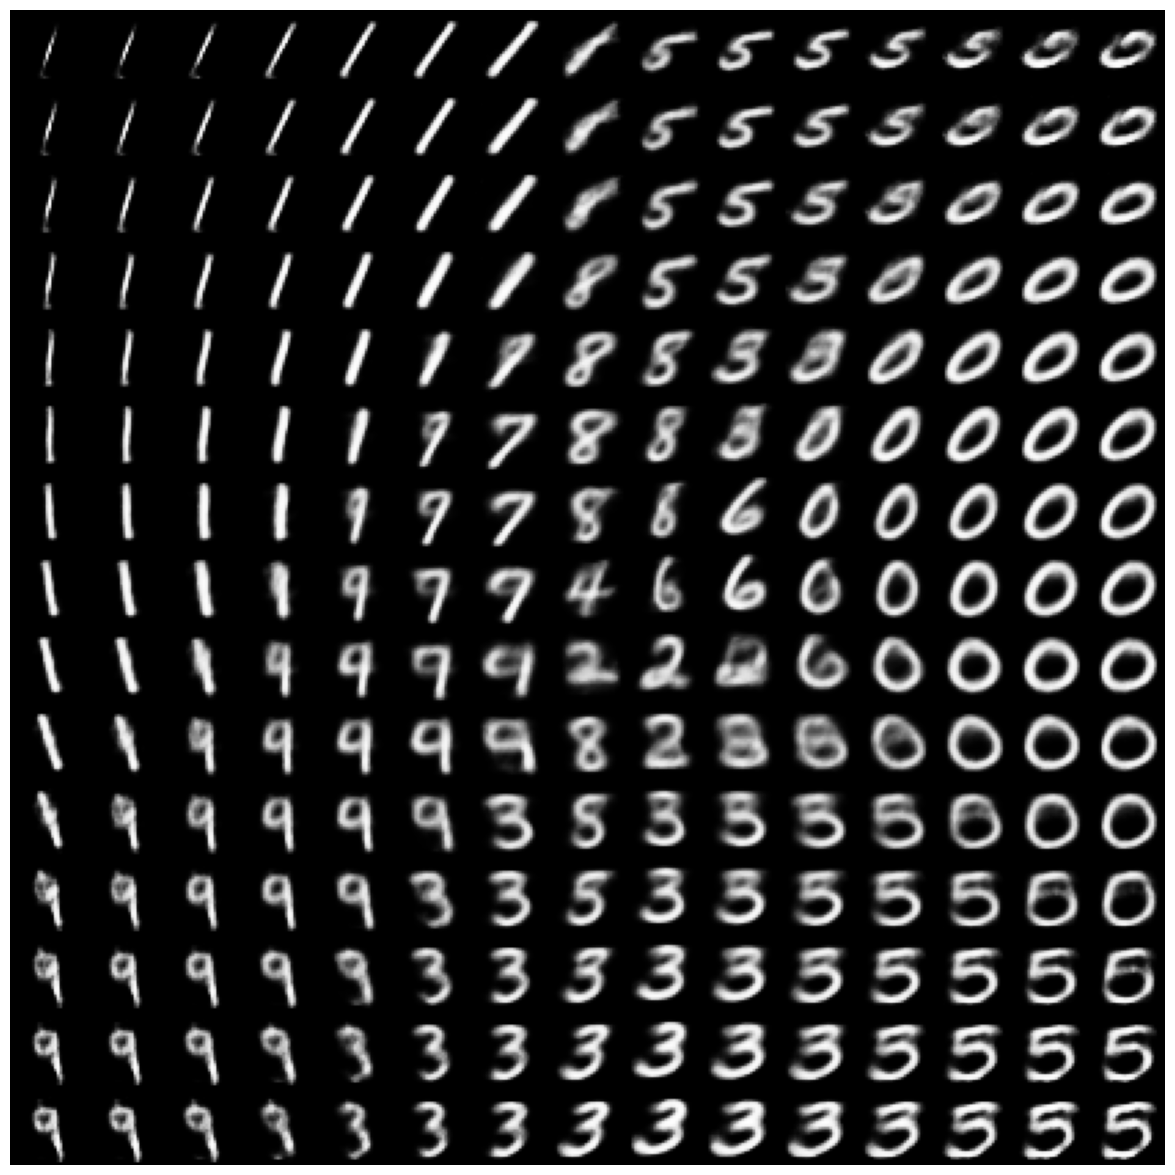

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))

# Latent space dimensions
latent_dim = 2

# Encoder
inputs = Input(shape=(28, 28, 1), name="encoder_input")
x = Flatten()(inputs)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
z_mean = Dense(latent_dim, name="z_mean")(x)
z_log_var = Dense(latent_dim, name="z_log_var")(x)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, name="z")([z_mean, z_log_var])

# Decoder
latent_inputs = Input(shape=(latent_dim,), name="decoder_input")
x = Dense(128, activation='relu')(latent_inputs)
x = Dense(256, activation='relu')(x)
x = Dense(28 * 28, activation='sigmoid')(x)
outputs = Reshape((28, 28, 1))(x)

# Define encoder and decoder models
encoder = Model(inputs, [z_mean, z_log_var, z], name="encoder")
decoder = Model(latent_inputs, outputs, name="decoder")

# VAE model
vae_outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, vae_outputs, name="vae")

# Custom loss within the Keras graph
class VAELossLayer(tf.keras.layers.Layer):
    def call(self, inputs, **kwargs):
        inputs, vae_outputs, z_mean, z_log_var = inputs
        reconstruction_loss = tf.reduce_mean(
            binary_crossentropy(
                tf.keras.backend.flatten(inputs),
                tf.keras.backend.flatten(vae_outputs)
            )
        )
        reconstruction_loss *= 28 * 28
        kl_loss = -0.5 * tf.reduce_sum(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1
        )
        total_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
        self.add_loss(total_loss)
        return vae_outputs

# Apply the custom loss layer
vae_outputs = VAELossLayer()([inputs, vae_outputs, z_mean, z_log_var])
vae = Model(inputs, vae_outputs, name="vae")

# Compile and train the model
vae.compile(optimizer='adam')
vae.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test, x_test))

# Generate new digits from the latent space
def plot_latent_space(decoder, n=15, figsize=15):
    digit_size = 28
    scale = 3.0
    figure = np.zeros((digit_size * n, digit_size * n))
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(figsize, figsize))
    plt.imshow(figure, cmap="Greys_r")
    plt.axis('off')
    plt.show()

plot_latent_space(decoder)
